2a Questao: (5,0 pontos) Utilizando um banco de dados sugerido por voce, aborde o problema de regressao utilizando o algoritmo k-NN. Implemente a regressao em Jupyter Notebook.

O código realiza a análise de classificação utilizando o algoritmo k-NN. Ele carrega o conjunto de dados de câncer de mama, aplica a redução de dimensionalidade usando PCA para visualização em um gráfico 3D e, em seguida, separa os dados em conjuntos de treinamento e teste. A partir disso, ele itera sobre diferentes valores de k, treina e avalia o modelo k-NN para cada valor de k. Em seguida, plota a acurácia em função do valor de k e escolhe o melhor valor de k com base na maior acurácia obtida. Por fim, ele treina o modelo com o melhor valor de k e plota a matriz de confusão para avaliar o desempenho do modelo.

/tmp/ipykernel_131/1313675176.py:27: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=115)


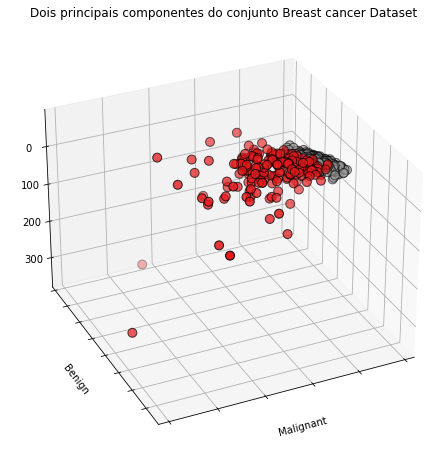

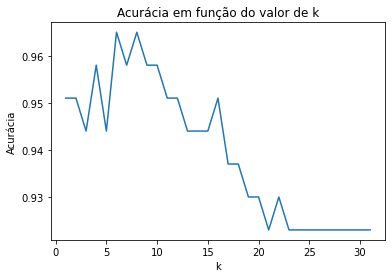

Melhor valor de k: 6
Taxa de acerto = 96.5 %

Matriz de confusão:



/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


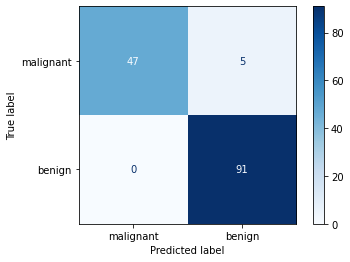

In [26]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Importação dos dados - Breast dataset
data = load_breast_cancer()
class_names = data.target_names
X = data.data
y = data.target

list(data.target_names)

# Redução de dimensionalidade usando PCA (Principal Component Analysis)

#Para melhor entendimento e compreensão da estrutura dos dados aplicamos o algoritmo de redução de dimensionalidade PCA para visualizarmos os dados em 3 dimensões.

#Essa técnica de análise dos componentes principais é comumente usada para compressão, visualização e classificação de dados. A ideia central é reduzir a dimensionalidade de um conjunto de dados com o mínimo de perda de informação.

#As componentes principais em geral são extraídas via matriz de covariância, as quais são influenciadas pelas variáveis de maior variância.


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=115)
X_reduced = PCA(n_components=3).fit_transform(data.data)  # aplicação da PCA
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=80)
ax.set_title("Dois principais componentes do conjunto Breast cancer Dataset")
ax.set_xlabel("Malignant")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Benign")
ax.w_yaxis.set_ticklabels([])
plt.show()

# Separar em dois conjuntos de dados (treinamento e teste)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Aplicação kNN para diferentes valores de k
k_values = range(1, 32)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    classificacoes_knn = knn.predict(X_test)
    acertos_knn = metrics.accuracy_score(y_test, classificacoes_knn)
    accuracy_scores.append(acertos_knn)

# Plotar a acurácia em função do valor de k
plt.plot(k_values, accuracy_scores)
plt.xlabel('k')
plt.ylabel('Acurácia')
plt.title('Acurácia em função do valor de k')
plt.show()

# Escolher o melhor valor de k
best_k = k_values[np.argmax(accuracy_scores)]
print("Melhor valor de k:", best_k)

# Aplicar o k-NN com o melhor valor de k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
classificacoes_knn = knn.predict(X_test)
acertos_knn = metrics.accuracy_score(y_test, classificacoes_knn)
print('Taxa de acerto =', round(acertos_knn * 100, 2), "%\n")

# Matriz de confusão
print('Matriz de confusão:\n')
cm_knn = plot_confusion_matrix(knn, X_test, y_test,
                               display_labels=class_names,
                               cmap=plt.cm.Blues)


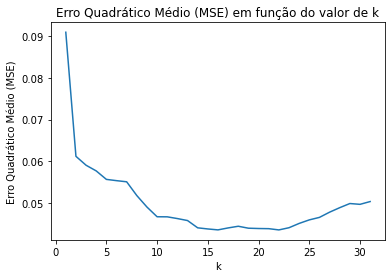

Melhor valor de k: 22
Erro Quadrático Médio (MSE): 0.04356181009073572
Coeficiente de Determinação (R2): 0.7980055658627087


In [27]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

# Importação dos dados
data = load_breast_cancer()
X = data.data
y = data.target

# Separar em dois conjuntos de dados (treinamento e teste)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Aplicação do k-NN para diferentes valores de k
k_values = range(1, 32)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plotar o erro quadrático médio (MSE) em função do valor de k
plt.plot(k_values, mse_scores)
plt.xlabel('k')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Erro Quadrático Médio (MSE) em função do valor de k')
plt.show()

# Escolher o melhor valor de k
best_k = k_values[mse_scores.index(min(mse_scores))]
print("Melhor valor de k:", best_k)

# Aplicar o k-NN com o melhor valor de k
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Avaliar o desempenho do modelo
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R2):", r2)
